In [1]:
import os
import os.path
import pandas as pd
import sys
sys.path.append('..')
from src.utils.data import writePandas, getPandas, getConfig
os.chdir('..')
os.getcwd()

'/home/biobot/disk/ldopa'

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = getPandas('pat_data')
conf = getConfig('data')
used_inds = conf['indices']['pat']['train'] + conf['indices']['pat']['test']
used_inds = conf['indices']['pat']['train']
fmriprep_radiomics = getPandas('pat_fmriprep_MNI_radiomic')
iter1_radiomics = getPandas('pat_ANTs_Reg_radiomic')
iter2_radiomics = getPandas('pat_ANTs_Reg_2_radiomic')
fmriprep_radiomics = fmriprep_radiomics.loc[used_inds].reset_index(drop=True)
iter1_radiomics = iter1_radiomics.loc[used_inds].reset_index(drop=True)
iter2_radiomics = iter2_radiomics.loc[used_inds].reset_index(drop=True)
data = data.loc[used_inds].reset_index(drop=True)

rSN_original_glcm_ClusterProminence
Corr 0.999547208905934


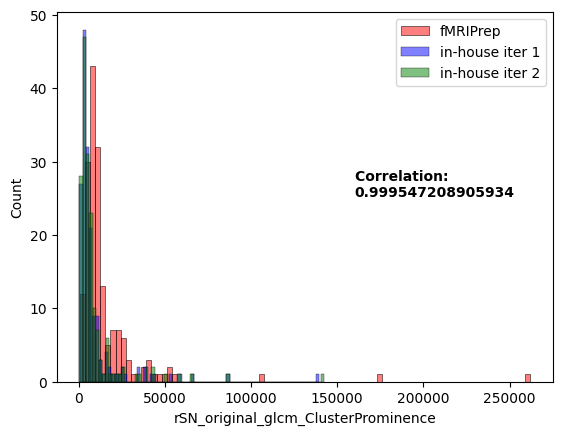

rCAU_original_gldm_LargeDependenceHighGrayLevelEmphasis
Corr 0.9904089705206992


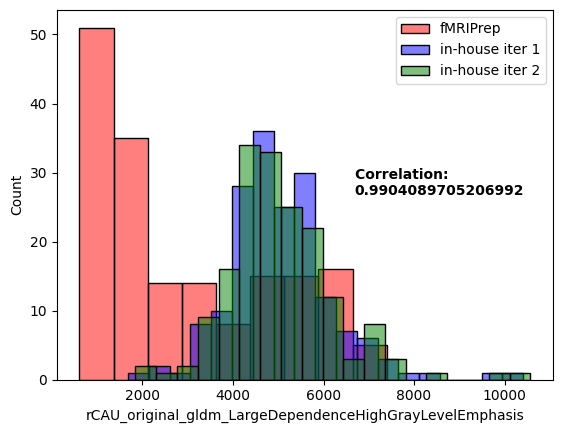

rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis
Corr 0.9950987038228813


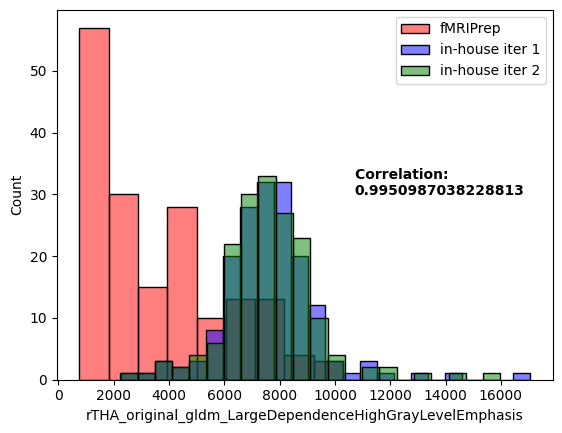

rTHA_original_glszm_LargeAreaHighGrayLevelEmphasis
Corr 0.998463863332441


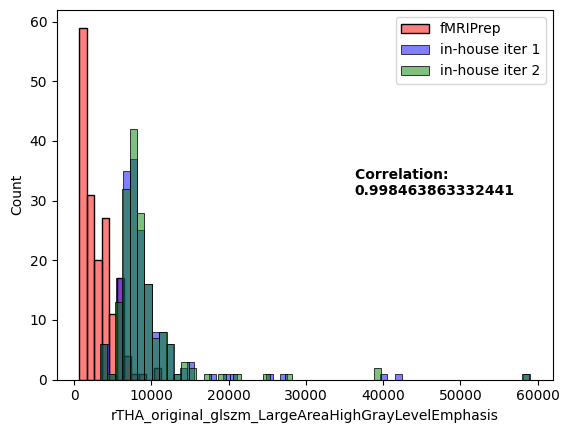

In [38]:
cols = [
    'rSN_original_glcm_ClusterProminence',
    'rCAU_original_gldm_LargeDependenceHighGrayLevelEmphasis',
    'rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis',
    'rTHA_original_glszm_LargeAreaHighGrayLevelEmphasis'
    ]
for col in cols:
    print(col)
    print('Corr', iter2_radiomics[col].corr(iter1_radiomics[col]))
    sns.histplot(fmriprep_radiomics[col], color='red', alpha=0.5)
    sns.histplot(iter1_radiomics[col], color='blue', alpha=0.5)
    sns.histplot(iter2_radiomics[col], color='green', alpha=0.5)
    plt.annotate('Correlation: \n' + str(iter2_radiomics[col].corr(iter1_radiomics[col])), xy=(0.5, 0.5), xycoords='axes fraction', xytext=(0.6, 0.5), textcoords='axes fraction', size='medium', color='black', weight='semibold')
    plt.legend(['fMRIPrep', 'in-house iter 1', 'in-house iter 2'])
    plt.show()

rSN_original_glcm_ClusterProminence
pvalue 0.046474564218245314


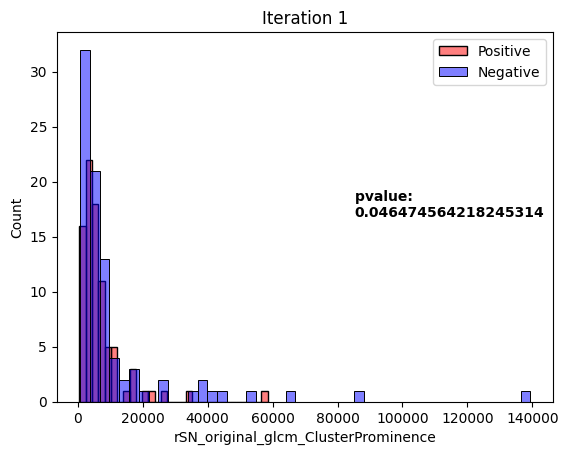

rCAU_original_gldm_LargeDependenceHighGrayLevelEmphasis
pvalue 0.06914859990286135


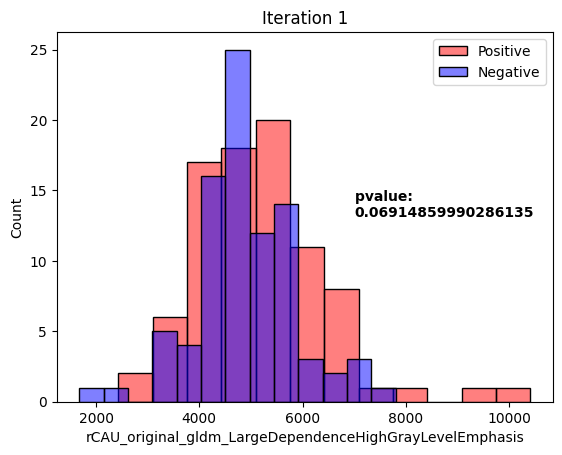

rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis
pvalue 0.023527003658623775


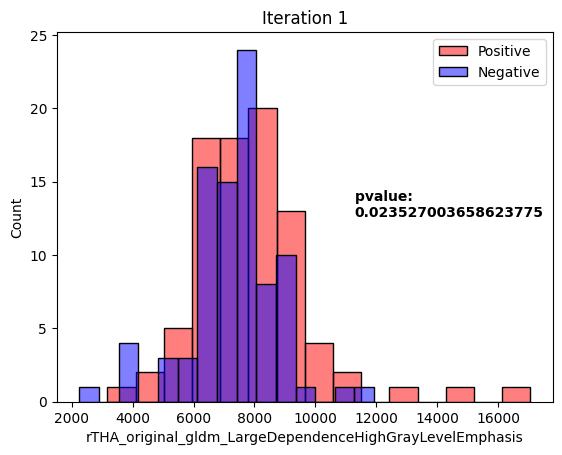

rTHA_original_glszm_LargeAreaHighGrayLevelEmphasis
pvalue 0.03565301097265599


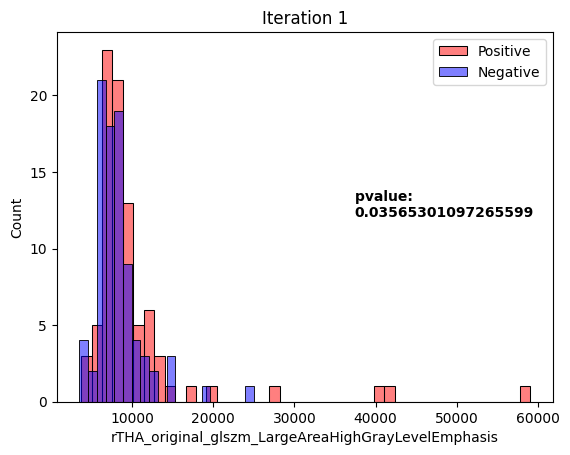

rSN_original_glcm_ClusterProminence
pvalue 0.05027195973017325


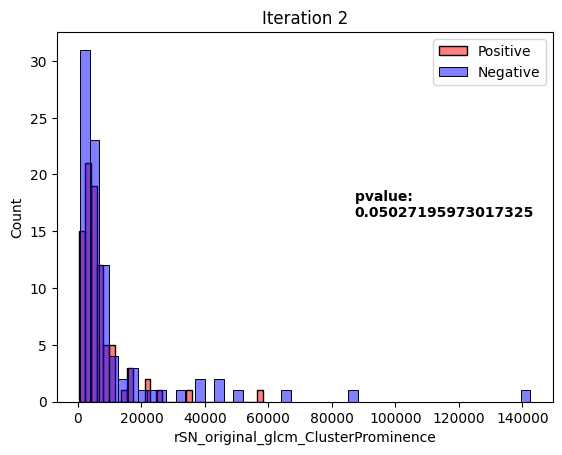

rCAU_original_gldm_LargeDependenceHighGrayLevelEmphasis
pvalue 0.03948355267456943


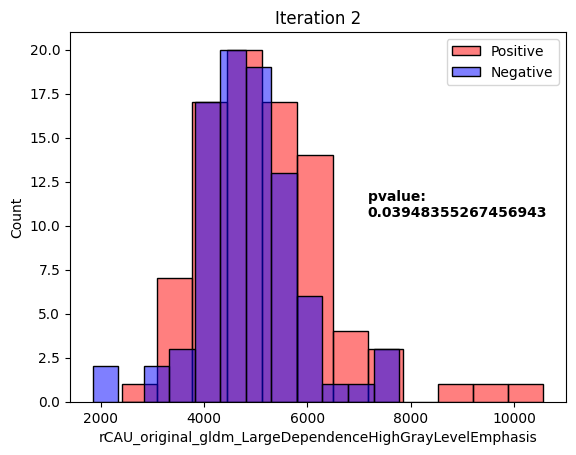

rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis
pvalue 0.032148169225946634


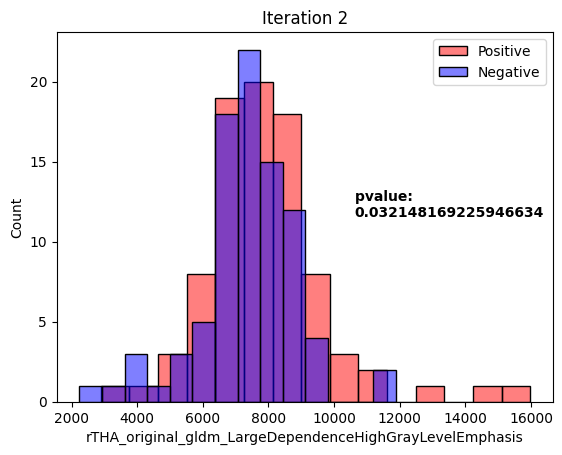

rTHA_original_glszm_LargeAreaHighGrayLevelEmphasis
pvalue 0.0404346772265079


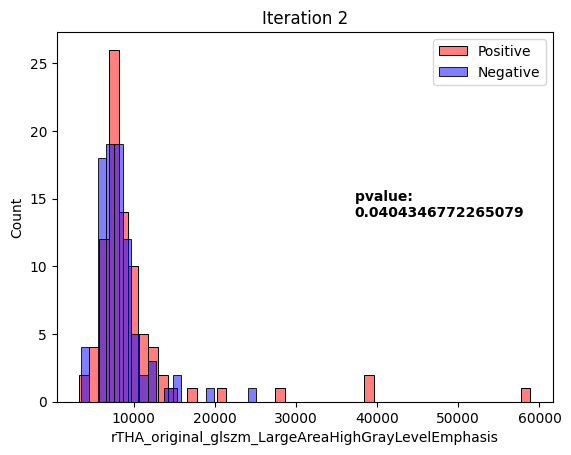

rSN_original_glcm_ClusterProminence
pvalue 0.33147145092050967


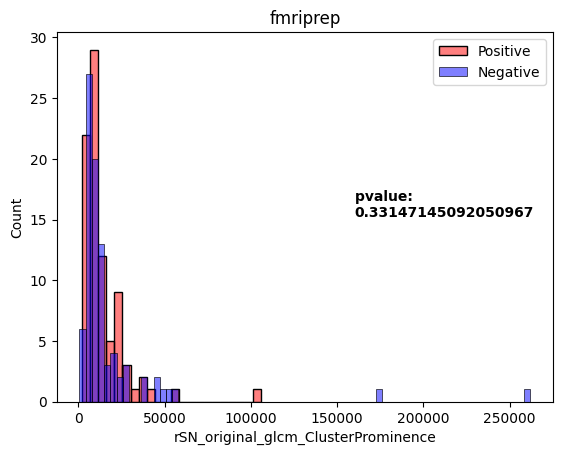

rCAU_original_gldm_LargeDependenceHighGrayLevelEmphasis
pvalue 0.5984889366372318


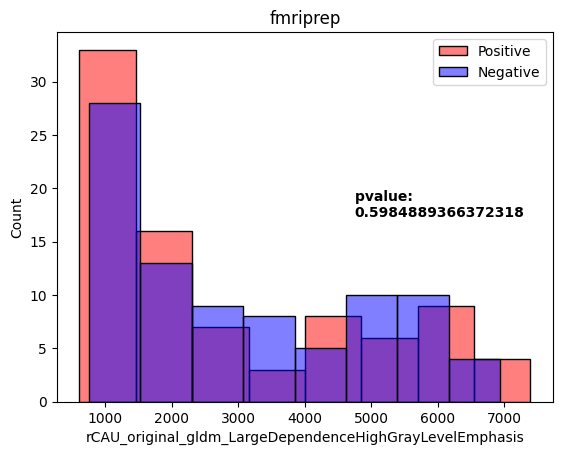

rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis
pvalue 0.44643064105409447


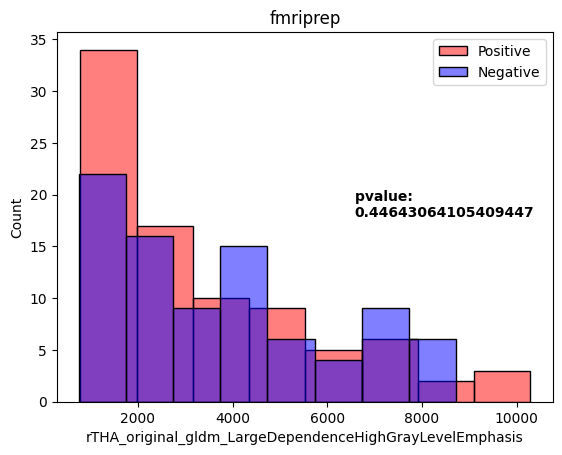

rTHA_original_glszm_LargeAreaHighGrayLevelEmphasis
pvalue 0.6548161688024827


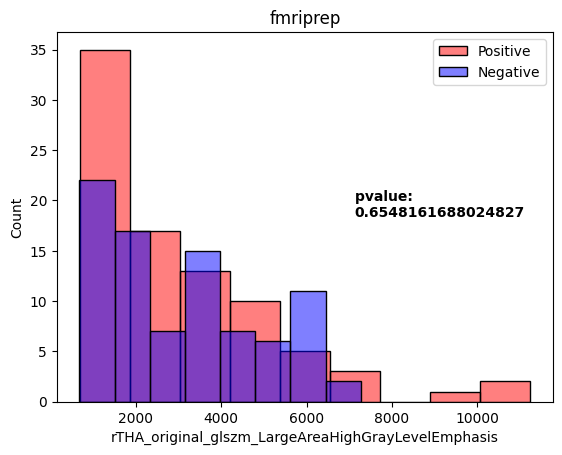

In [49]:
iter1_pos = iter1_radiomics.loc[data['CAT'] == 1]
iter1_neg = iter1_radiomics.loc[data['CAT'] == 0]
fmriprep_pos = fmriprep_radiomics.loc[data['CAT'] == 1]
fmriprep_neg = fmriprep_radiomics.loc[data['CAT'] == 0]
iter2_pos = iter2_radiomics.loc[data['CAT'] == 1]
iter2_neg = iter2_radiomics.loc[data['CAT'] == 0]
from scipy import stats
for col in cols:
    print(col)
    print('pvalue', stats.ttest_ind(iter1_pos[col], iter1_neg[col])[1])
    sns.histplot(iter1_pos[col], color='red', alpha=0.5)
    sns.histplot(iter1_neg[col], color='blue', alpha=0.5)
    plt.annotate('pvalue: \n' + str(stats.ttest_ind(iter1_pos[col], iter1_neg[col])[1]), xy=(0.5, 0.5), xycoords='axes fraction', xytext=(0.6, 0.5), textcoords='axes fraction', size='medium', color='black', weight='semibold')
    plt.legend(['Positive', 'Negative'])
    plt.title('Iteration 1')
    plt.show()
#for col in cols:
    #print(col)
    #print('pvalue', stats.ttest_ind(fmripreppos[col], fmriprepneg[col])[1])
    #sns.histplot(fmripreppos[col], color='red', alpha=0.5)
    #sns.histplot(fmriprepneg[col], color='blue', alpha=0.5)
    #plt.legend(['Positive', 'Negative'])
    #plt.show()
for col in cols:
    print(col)
    print('pvalue', stats.ttest_ind(iter2_pos[col], iter2_neg[col])[1])
    sns.histplot(iter2_pos[col], color='red', alpha=0.5)
    sns.histplot(iter2_neg[col], color='blue', alpha=0.5)
    plt.annotate('pvalue: \n' + str(stats.ttest_ind(iter2_pos[col], iter2_neg[col])[1]), xy=(0.5, 0.5), xycoords='axes fraction', xytext=(0.6, 0.5), textcoords='axes fraction', size='medium', color='black', weight='semibold')
    plt.legend(['Positive', 'Negative'])
    plt.title('Iteration 2')
    plt.show()
for col in cols:
    print(col)
    print('pvalue', stats.ttest_ind(fmriprep_pos[col], fmriprep_neg[col])[1])
    sns.histplot(fmriprep_pos[col], color='red', alpha=0.5)
    sns.histplot(fmriprep_neg[col], color='blue', alpha=0.5)
    plt.annotate('pvalue: \n' + str(stats.ttest_ind(fmriprep_pos[col], fmriprep_neg[col])[1]), xy=(0.5, 0.5), xycoords='axes fraction', xytext=(0.6, 0.5), textcoords='axes fraction', size='medium', color='black', weight='semibold')
    plt.legend(['Positive', 'Negative'])
    plt.title('fmriprep')
    plt.show()

In [47]:
for col in cols:
    print(col)
    var0 = fmriprep_radiomics[col].var()
    var1 = iter1_radiomics[col].var()
    var2 = iter2_radiomics[col].var()
    print('fmri vs. iter1', var0/var1)
    print('fmri vs. iter2', var0/var2)
    print('iter1 vs. iter2', var1/var2)
    print()

rSN_original_glcm_ClusterProminence
fmri vs. iter1 2.7411619884415748
fmri vs. iter2 2.7181717575696376
iter1 vs. iter2 0.9916129615947987

rCAU_original_gldm_LargeDependenceHighGrayLevelEmphasis
fmri vs. iter1 2.798286988789948
fmri vs. iter2 2.676945835041212
iter1 vs. iter2 0.9566373448345956

rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis
fmri vs. iter1 1.7868056250461273
fmri vs. iter2 1.8304288267438196
iter1 vs. iter2 1.0244140722897972

rTHA_original_glszm_LargeAreaHighGrayLevelEmphasis
fmri vs. iter1 0.11014777285849772
fmri vs. iter2 0.11393147815462132
iter1 vs. iter2 1.034351173863355



rPUT_original_glcm_ClusterShade 0.028346800798266993 0.030210476606080675


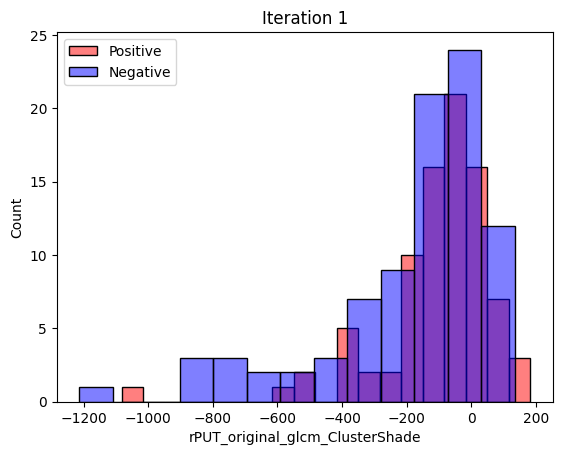

rGPe_original_glszm_GrayLevelVariance 0.04258291247954658 0.04549307752678206


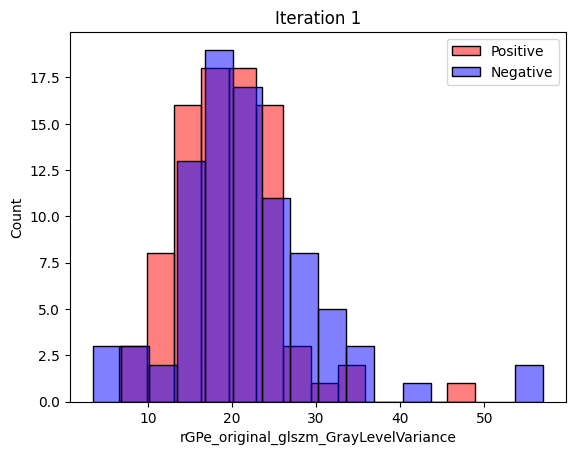

rTHA_original_glcm_Idn 0.013925795898176782 0.017876935566080436


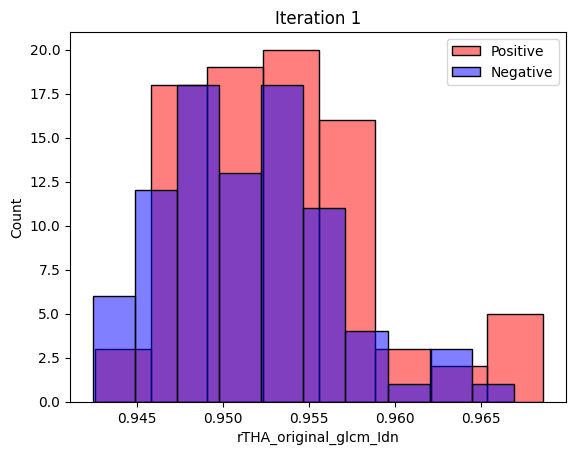

rTHA_original_glszm_LargeAreaHighGrayLevelEmphasis 0.03565301097265599 0.0404346772265079


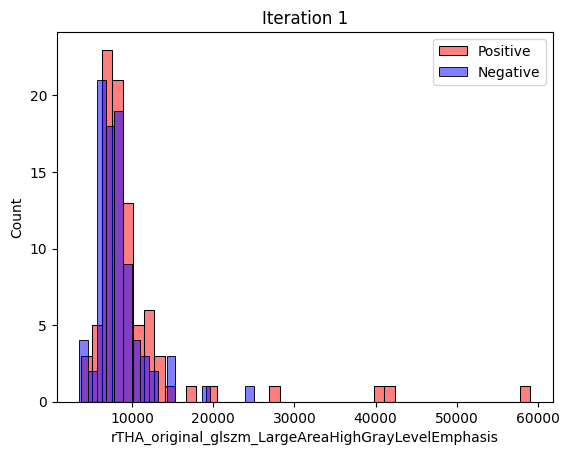

rTHA_original_glszm_ZoneEntropy 0.03821297157924482 0.04426048282337814


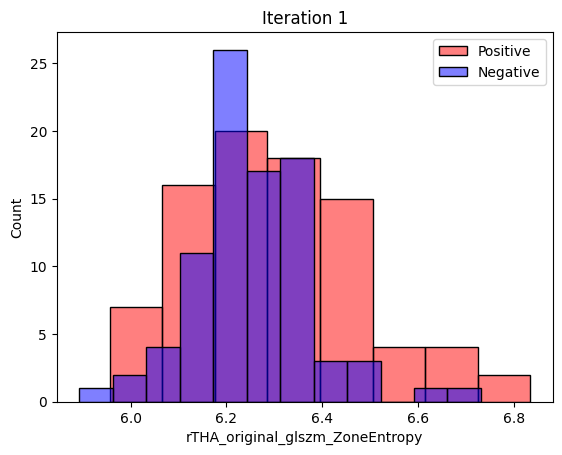

rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis 0.023527003658623775 0.032148169225946634


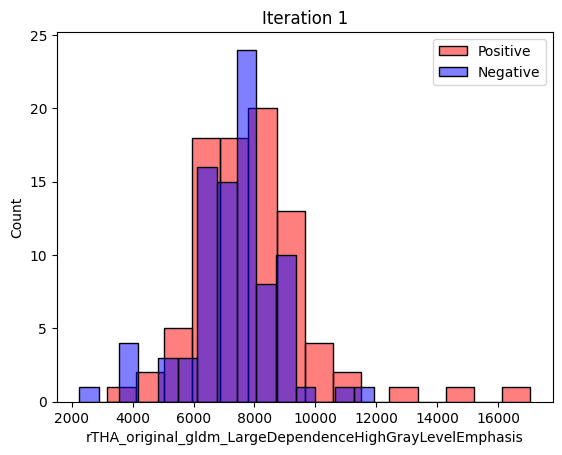

6
['rPUT_original_glcm_ClusterShade', 'rGPe_original_glszm_GrayLevelVariance', 'rTHA_original_glcm_Idn', 'rTHA_original_glszm_LargeAreaHighGrayLevelEmphasis', 'rTHA_original_glszm_ZoneEntropy', 'rTHA_original_gldm_LargeDependenceHighGrayLevelEmphasis']


In [8]:
from scipy import stats
iter1_pos = iter1_radiomics.loc[data['CAT'] == 1]
iter1_neg = iter1_radiomics.loc[data['CAT'] == 0]
fmripreppos = fmriprep_radiomics.loc[data['CAT'] == 1]
fmriprepneg = fmriprep_radiomics.loc[data['CAT'] == 0]
iter2_pos = iter2_radiomics.loc[data['CAT'] == 1]
iter2_neg = iter2_radiomics.loc[data['CAT'] == 0]
cols = iter1_radiomics.columns
cols = [col for col in cols if 'KEY' not in col]
cols2 = iter2_radiomics.columns
count = 0
feature_list = []
for col in cols:
    if col not in cols2:
        continue
    pval1 = stats.ttest_ind(iter1_pos[col], iter1_neg[col])[1]
    pval2 = stats.ttest_ind(iter2_pos[col], iter2_neg[col])[1]
    if pval1 < 0.05 and pval2 < 0.05:
        print(col, pval1, pval2)
        sns.histplot(iter1_pos[col], color='red', alpha=0.5)
        sns.histplot(iter1_neg[col], color='blue', alpha=0.5)
        plt.legend(['Positive', 'Negative'])
        plt.title('Iteration 1')
        plt.show()
        count += 1
        feature_list.append(col)
print(count)
print(feature_list)